In [1]:
# first I would want you get data
# neccesary cleaning
# choose model for the job
# import libaries

In [3]:
# libraries for data and visualization
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# libraries for model
import tensorflow as tf
import keras
#

In [5]:
# mount drive
#from google.colab import drive
#drive.mount('/content/drive')
import os

notebook_path = os.getcwd()
print(notebook_path)
print(os.listdir("C:/Users/Windows 10/Documents/PortfolioProjects/GITHUB_PROJECTS_ML/COMPUTER_VISION"))

C:\Users\Windows 10\Documents\PortfolioProjects\GITHUB_PROJECTS_ML\COMPUTER_VISION
['.git', '.ipynb_checkpoints', 'cats_and_dogs_filtered', 'cats_and_dogs_filtered.zip', 'computer_vision_cats_Dog_bird.ipynb']


In [4]:
#%cd 

In [3]:
import requests

def download_file(url, filename=None):
    """Downloads a file from a URL.

    Args:
        url: The URL of the file to download.
        filename: The filename to save the file to. If None, the filename will be
            inferred from the URL.

    Returns:
        The path to the downloaded file.
    """

    response = requests.get(url)
    if response.status_code != 200:
        raise Exception("Failed to download file.")

    if filename is None:
        filename = url.split("/")[-1]

    with open(filename, "wb") as file:
        file.write(response.content)

    return filename


In [14]:
url = "https://storage.googleapis.com/tensorflow-1-public/course2/cats_and_dogs_filtered.zip"
download_file(url)

'cats_and_dogs_filtered.zip'

In [15]:
import os
import zipfile
zip_path = './cats_and_dogs_filtered.zip'
zipped = zipfile.ZipFile(zip_path, 'r')
zipped.extractall()

zipped.close()

In [6]:
base_dir = 'cats_and_dogs_filtered'
print("Contents of base directory:")
print(os.listdir(base_dir))

print("\nContents of train directory:")
print(os.listdir(f'{base_dir}/train'))

print("\nContents of validation directory:")
print(os.listdir(f'{base_dir}/validation'))


Contents of base directory:
['.ipynb_checkpoints', 'train', 'validation', 'vectorize.py']

Contents of train directory:
['cats', 'dogs']

Contents of validation directory:
['cats', 'dogs']


In [7]:
#Just assigning directories to a variable
# so we can use it later

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with training cat/dog pictures
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with validation cat/dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')


In [8]:
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.101.jpg', 'cat.102.jpg', 'cat.103.jpg', 'cat.104.jpg', 'cat.105.jpg', 'cat.106.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']


In [9]:
print('total training cat images :', len(os.listdir(      train_cats_dir ) ))
print('total training dog images :', len(os.listdir(      train_dogs_dir ) ))

print('total validation cat images :', len(os.listdir( validation_cats_dir ) ))
print('total validation dog images :', len(os.listdir( validation_dogs_dir ) ))

total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500


In [10]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images

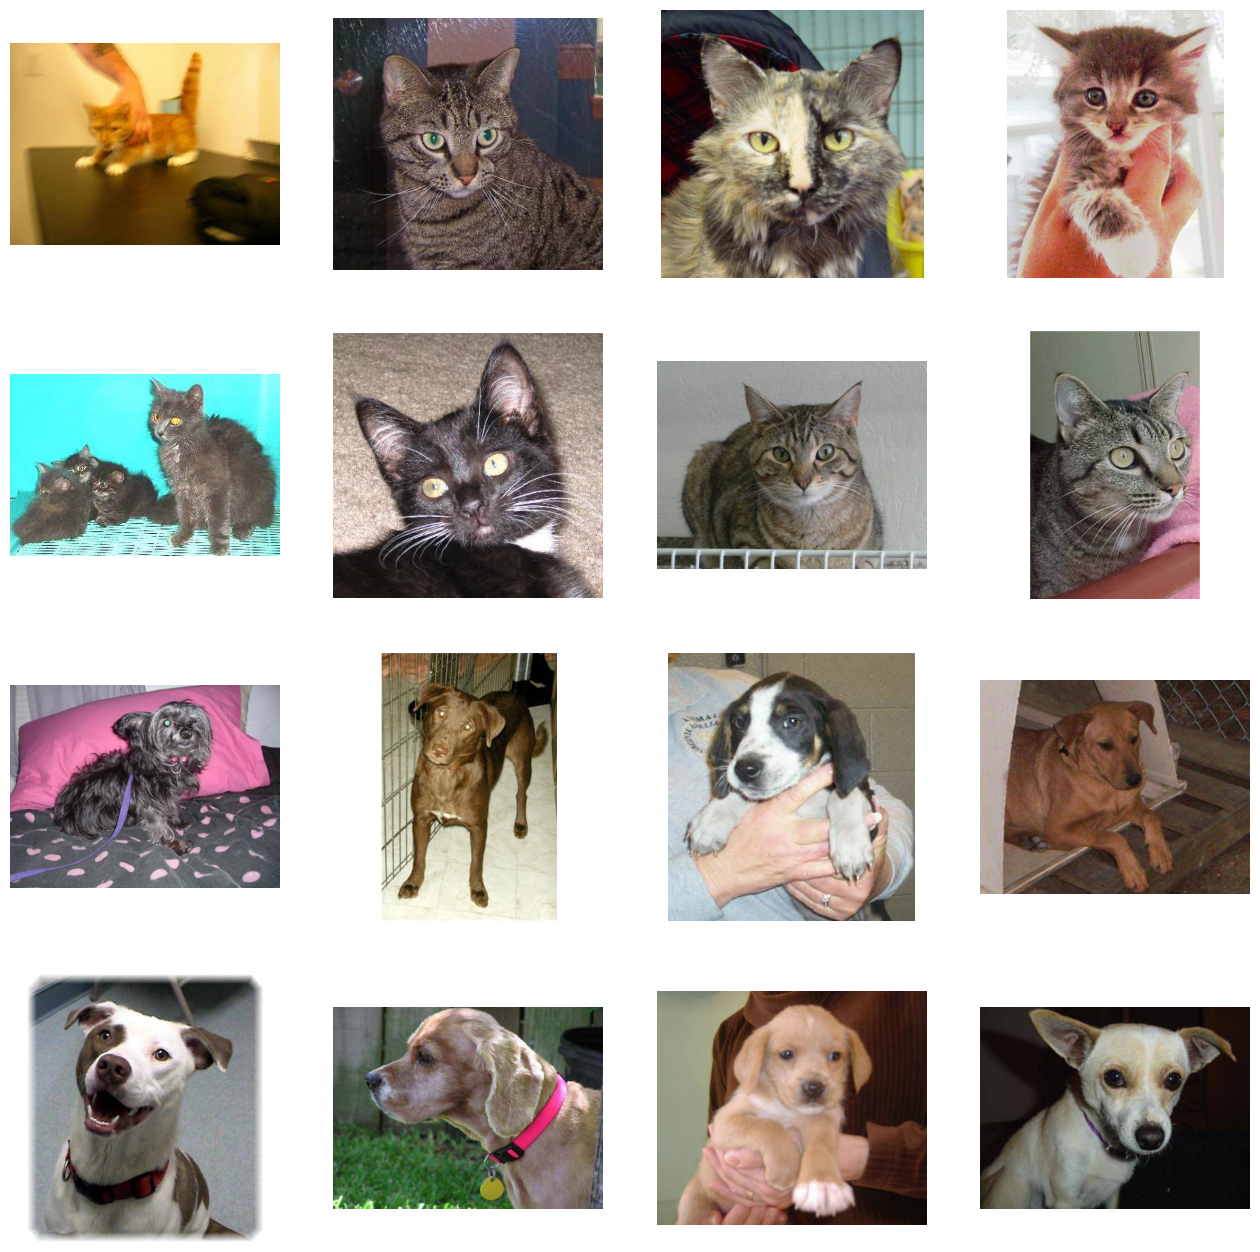

In [11]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_cat_pix = [os.path.join(train_cats_dir, fname)
                for fname in train_cat_fnames[ pic_index-8:pic_index]
               ]

next_dog_pix = [os.path.join(train_dogs_dir, fname)
                for fname in train_dog_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
    
  # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()



In [20]:
from tensorflow.keras.optimizers import RMSprop
def create_model(lr =0.001, loss = 'binary_crossentropy', metrics = ['accuracy']):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(16,(3,3), activation='relu', input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPool2D(2,2),
        tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
        tf.keras.layers.MaxPool2D(2,2),
        tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
        tf.keras.layers.MaxPool2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=RMSprop(learning_rate=lr),
              loss=loss,
              metrics = metrics)
    return model


In [21]:
model = create_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 74, 74, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 17, 17, 64)       

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [23]:
EPOCHS =20

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator(rescale = 1.0/255.,
                                  rotation_range = 40,
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True,
                                  fill_mode ='nearest')


test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [24]:
history = model.fit(
            train_generator,
            epochs=EPOCHS,
            validation_data=validation_generator,
            verbose=2,
            validation_steps = 50,
            steps_per_epoch = 100
            )

Epoch 1/20
100/100 - 82s - loss: 0.7027 - accuracy: 0.5160 - val_loss: 0.6908 - val_accuracy: 0.5270 - 82s/epoch - 816ms/step
Epoch 2/20
100/100 - 70s - loss: 0.6911 - accuracy: 0.5585 - val_loss: 0.8218 - val_accuracy: 0.5190 - 70s/epoch - 696ms/step
Epoch 3/20
100/100 - 70s - loss: 0.6662 - accuracy: 0.6055 - val_loss: 0.6158 - val_accuracy: 0.6720 - 70s/epoch - 704ms/step
Epoch 4/20
100/100 - 64s - loss: 0.6342 - accuracy: 0.6355 - val_loss: 0.5872 - val_accuracy: 0.6910 - 64s/epoch - 637ms/step
Epoch 5/20
100/100 - 68s - loss: 0.6447 - accuracy: 0.6370 - val_loss: 0.5926 - val_accuracy: 0.6900 - 68s/epoch - 676ms/step
Epoch 6/20
100/100 - 77s - loss: 0.6145 - accuracy: 0.6655 - val_loss: 0.5963 - val_accuracy: 0.6900 - 77s/epoch - 765ms/step
Epoch 7/20
100/100 - 67s - loss: 0.6067 - accuracy: 0.6740 - val_loss: 0.5746 - val_accuracy: 0.7030 - 67s/epoch - 672ms/step
Epoch 8/20
100/100 - 66s - loss: 0.5932 - accuracy: 0.6840 - val_loss: 0.5723 - val_accuracy: 0.7010 - 66s/epoch - 658

1/1 [==============================] - 0s 137ms/step


C:\Users\Windows 10\AppData\Local\Temp\ipykernel_2648\2313827222.py:49: RuntimeWarning: invalid value encountered in divide
  x /= x.std()
C:\Users\Windows 10\AppData\Local\Temp\ipykernel_2648\2313827222.py:52: RuntimeWarning: invalid value encountered in cast
  x  = np.clip(x, 0, 255).astype('uint8')


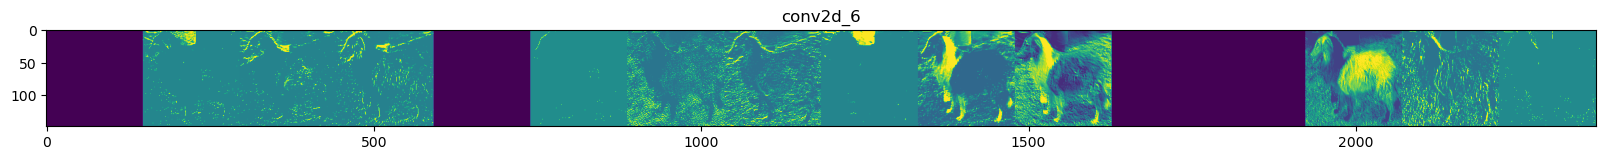

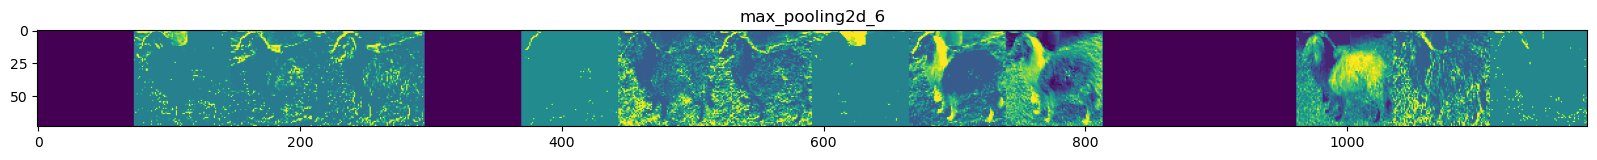

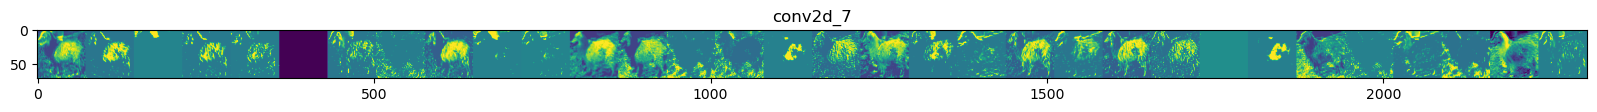

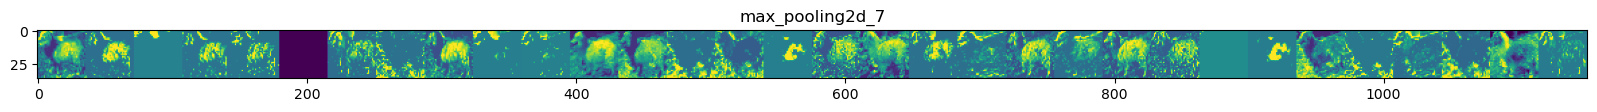

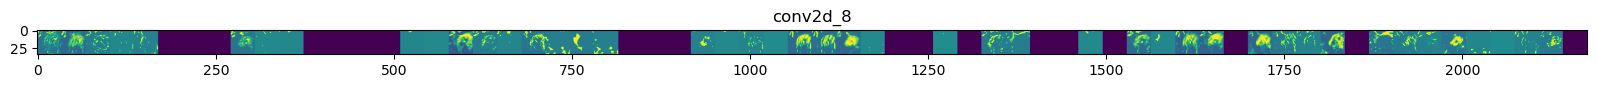

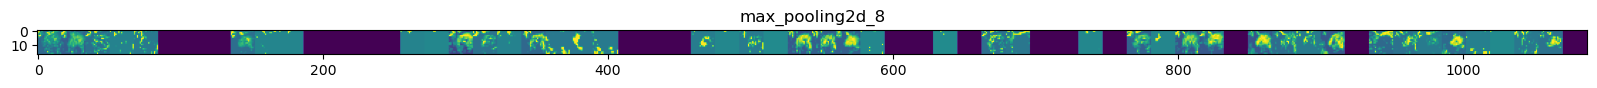

In [25]:
import numpy as np
import random
from tensorflow.keras.utils import img_to_array, load_img
%matplotlib inline

# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model
successive_outputs = [layer.output for layer in model.layers]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Prepare a random input image from the training set.
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_fnames]
img_path = random.choice(cat_img_files + dog_img_files)
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Scale by 1/255
x /= 255.0

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so you can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):

    if len(feature_map.shape) == 4:

        #-------------------------------------------
        # Just do this for the conv / maxpool layers, not the fully-connected layers
        #-------------------------------------------
        n_features = feature_map.shape[-1]  # number of features in the feature map
        size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)

        # Tile the images in this matrix
        display_grid = np.zeros((size, size * n_features))

        #-------------------------------------------------
        # Postprocess the feature to be visually palatable
        #-------------------------------------------------
        for i in range(n_features):
            x  = feature_map[0, :, :, i]
            x -= x.mean()
            x /= x.std()
            x *=  64
            x += 128
            x  = np.clip(x, 0, 255).astype('uint8')
            display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

        #-----------------
        # Display the grid
        #-----------------
        scale = 20. / n_features
        plt.figure(figsize=(scale * n_features, scale))
        plt.title (layer_name)
        plt.grid  (False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis' )

Text(0.5, 1.0, 'Training and validation loss')

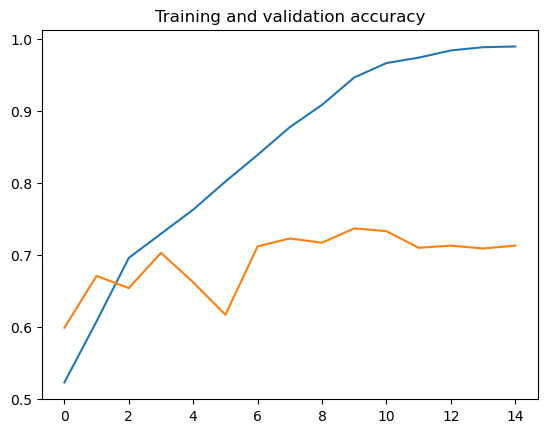

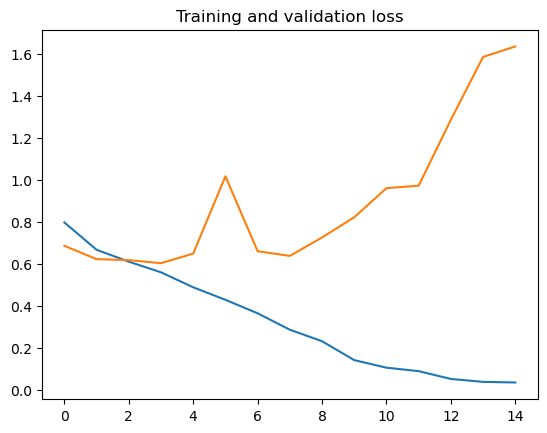

In [19]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history['accuracy' ]
val_acc  = history.history['val_accuracy' ]
loss     = history.history[ 'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs, acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs, loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )